#Introduction

We are going to focus highly on genre's. I want to know everything about Genre's.

Here are some things I want to look at:

#Research Question (Q):

    1. Which genres are the most common (number of movies made)?
    2. Which genres have high avg. profit, budget and revenue?
    3. Which genres have high avg. popularity?
    4. Which genres have highest number of movies with an voting avg. >=8?
    
#Research Hypotheses (H):

    1. The best movies according to vote avg. return high profit and revenue.
    2. The best movies according to popularity return high profit and revenue.
    3. Highly budgeted movies return high profit.
    4. Highly budgeted movies have a high popularity.
    5. Explore profit by genre and year in a time series.
    
    

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
movies = pd.read_csv(r'C:\Users\ngoct\OneDrive\Documents\PYTHON Project\analystbuilder\imdb_movies.csv')
movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df= movies

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

#Clean Data

In [6]:
#Check Duplicate
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#drop duplicate
df.drop_duplicates(inplace = True)

In [8]:
#Check Duplicate
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [9]:
#drop null value at genres column
df.dropna(subset = ['genres'], inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [11]:
df['profit'] = df['revenue'] - df['budget']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [13]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [62]:
#keep these columns for the analysis
df_genres = df[['popularity','budget','revenue','profit','original_title','runtime','genres','release_year','vote_count','vote_average']]

In [63]:
df_genres.head(5)

,popularity,budget,revenue,profit,original_title,runtime,genres,release_year,vote_count,vote_average
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.50
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.10
2,13.11,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.30
3,11.17,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.50
4,9.34,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.30


In [64]:
#split values at genres column to multile level of indexes
from pandas import Series, DataFrame
split = df_genres['genres'].str.split('|').apply(Series,1).stack()
split

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [65]:
split.index = split.index.droplevel(-1)
split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [66]:
split.name = 'genres_split'
del  df_genres['genres']
df_genres = df_genres.join(split)
df_genres.head(5)

,popularity,budget,revenue,profit,original_title,runtime,release_year,vote_count,vote_average,genres_split
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Action
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Adventure
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Science Fiction
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Thriller
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,2015,6185,7.10,Action


1. Which genres are the most common (number of movies made)?

In [19]:
df_count = pd.DataFrame(df_genres.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = False)
df_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

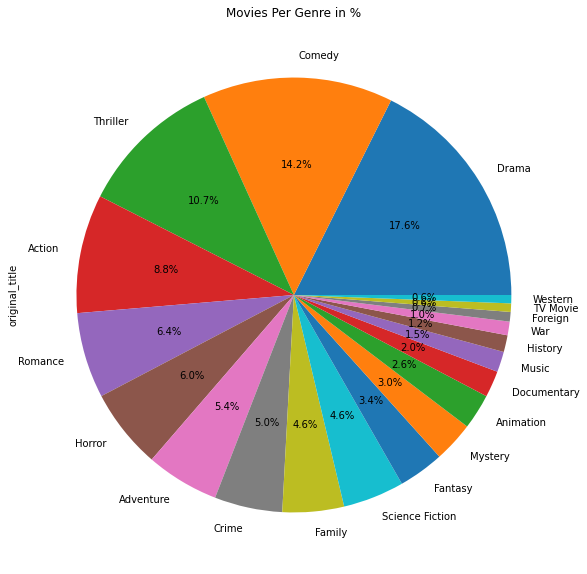

In [20]:
df_count['original_title'].plot.pie(title= 'Movies Per Genre in %', autopct= '%1.1f%%', figsize=(10, 10))    


<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

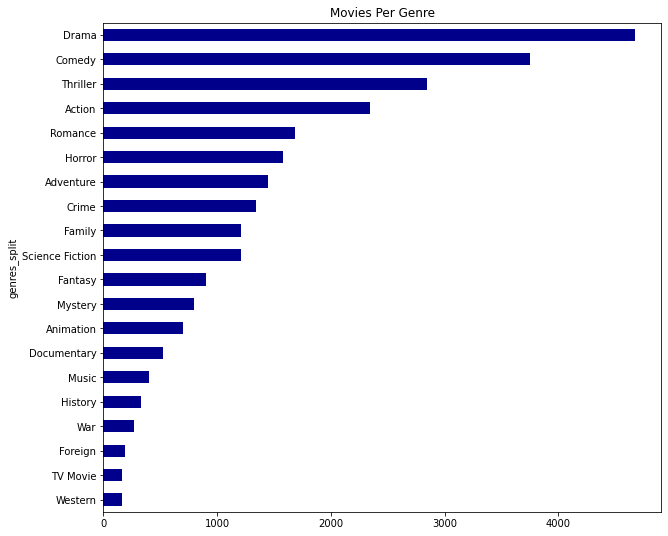

In [21]:
df_count_sorted = df_count.sort_values('original_title', ascending=True)
df_count_sorted['original_title'].plot.barh(title='Movies Per Genre', color = 'DarkBlue', figsize=(10, 9))

The top 5 movie genres are Drama (17.6%), Comedy (14.2%), Thriller (10.7%), Action (8.8%), and Romance (6.4%).

#2. Which genres have high avg. profit, budget and revenue?    

In [22]:
# Group by 'genres_split' and calculate the mean for numeric columns
df_avg = df_genres.groupby('genres_split').mean(numeric_only=True)
pd.options.display.float_format = '{:,.2f}'.format
df_avg

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
genres_split,,,,,,,
Action,0.93,"27,727,820.33","72,794,732.00","45,066,911.67",104.92,392.99,5.79
Adventure,1.15,"37,543,694.53","113,137,861.07","75,594,166.54",106.17,513.13,5.94
Animation,0.85,"23,159,781.61","75,256,062.22","52,096,280.62",68.18,303.00,6.40
Comedy,0.59,"13,297,915.62","37,526,242.07","24,228,326.45",96.75,176.44,5.91
Crime,0.74,"17,663,801.12","42,368,661.65","24,704,860.52",106.92,278.81,6.12
Documentary,0.18,"577,149.15","2,041,106.99","1,463,957.85",102.65,35.11,6.91
Drama,0.59,"11,880,717.77","29,232,255.73","17,351,537.95",110.48,182.54,6.17
Family,0.79,"23,359,337.42","72,433,176.37","49,073,838.95",89.60,272.32,6.00
Fantasy,0.99,"32,612,585.35","96,313,657.08","63,701,071.73",100.74,420.74,5.86


<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

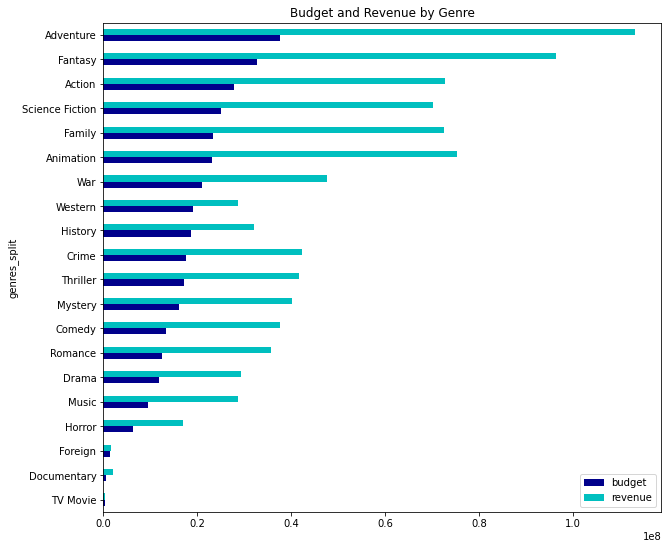

In [23]:
# Sort df_avg in place
df_avg.sort_values('budget', ascending=True, inplace=True)

# Use df_avg directly for plotting
df_avg[['budget', 'revenue']].plot.barh(title='Budget and Revenue by Genre', color=('DarkBlue', 'c'), figsize=(10, 9))

The top 5 movie genres with the highest average budgets are Drama, Adventure, Fantasy, Action, Science Fiction, and Family.

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

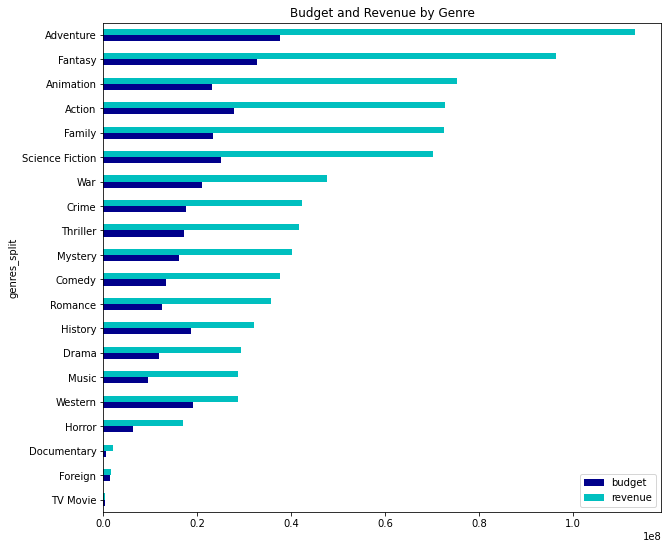

In [24]:
# Sort df_avg in place
df_avg.sort_values('revenue', ascending=True, inplace=True)

# Use df_avg directly for plotting
df_avg[['budget', 'revenue']].plot.barh(title='Budget and Revenue by Genre', color=('DarkBlue', 'c'), figsize=(10, 9))

The top 5 movie genres with the highest average revenues are Adventure, Fantasy, Animation, Action, and Family.

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

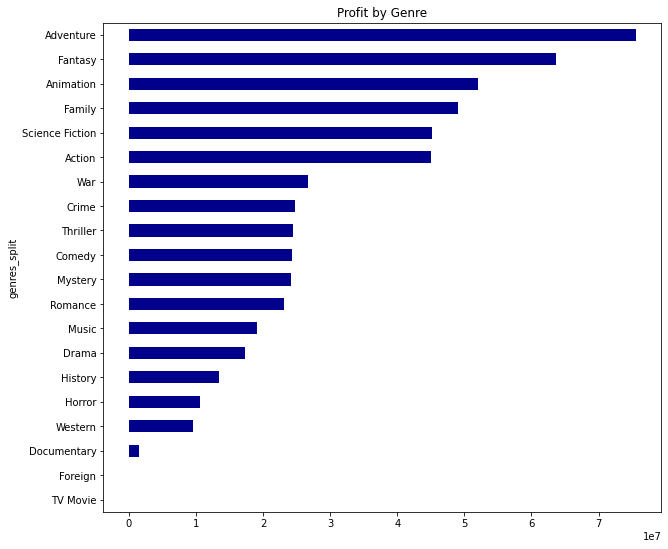

In [25]:
# Sort df_avg in place
df_avg.sort_values('profit', ascending=True, inplace=True)

# Use df_avg directly for plotting
df_avg['profit'].plot.barh(title='Profit by Genre', color='DarkBlue', figsize=(10, 9))

The top 5 movie genres with the highest average profit are Adventure, Fantasy, Animation, Family, and Science Fiction.

#3. Which genres have high avg. popularity?

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

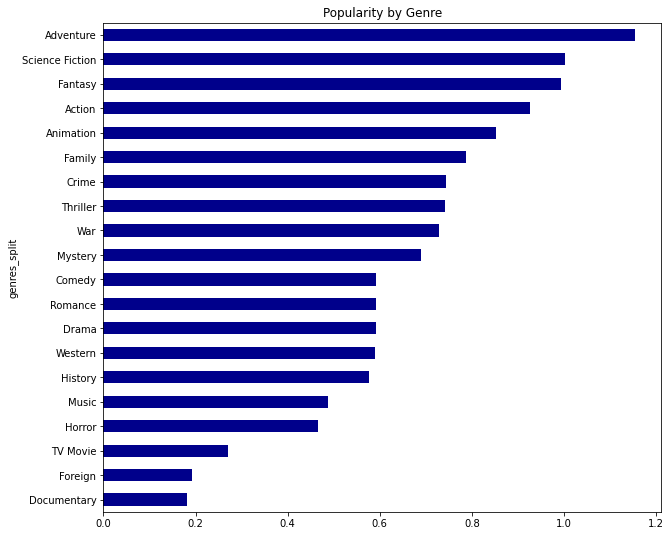

In [26]:
# Sort df_avg in place
df_avg.sort_values('popularity', ascending=True, inplace=True)

# Use df_avg directly for plotting
df_avg['popularity'].plot.barh(title='Popularity by Genre', color='DarkBlue', figsize=(10, 9))

The top 5 movie genres with the highest average popularity are Adventure, Science Fiction, Fantasy, Action, and Animation.

4. Which genres have highest number of movies with an voting avg. >=8?

In [27]:
df_genres.head()

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genres_split
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.50,Action
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.50,Adventure
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.50,Science Fiction
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.50,Thriller
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.10,Action


In [28]:
vote_fifty = df_genres[(df_genres['vote_count'] >= 50) & (df_genres['vote_average'] >=8)]
vote_zero = df_genres[df_genres['vote_average'] >= 8]

In [29]:
df_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = False)
df_vote

,vote_average
genres_split,
Documentary,5
Drama,5
Crime,4
Action,2
History,2
Thriller,2
Romance,2
Music,2
War,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

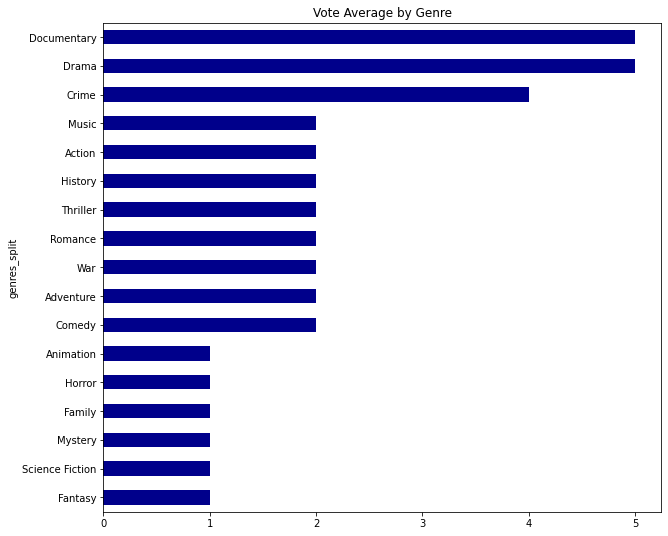

In [30]:
# Sort df_avg in place
df_vote.sort_values('vote_average', ascending=True, inplace=True)
# Use df_avg directly for plotting
df_vote['vote_average'].plot.barh(title='Vote Average by Genre', color='DarkBlue', figsize=(10, 9))

The top 3 movie genres with the highest number of movies with an voting avg. >=8 are Documentary, Drama, and Crime.

PART B

 1. The best movies according to vote avg. return high profit and revenue.

In [31]:
#drop duplicate
df.drop_duplicates(inplace = True)

df['profit'] = df['revenue'] - df['budget']
#keep these columns for the analysis
df_genres = df[['popularity','budget','revenue','profit','original_title','runtime','genres','release_date','vote_count','vote_average']]

In [32]:
df_genres.head(5)

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,vote_count,vote_average
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10
2,13.11,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30
3,11.17,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50
4,9.34,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30


In [36]:
df_counted = df_genres[df_genres['vote_count'] >= 50]
df_counted.corr(method = 'spearman', numeric_only=True)

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
popularity,1.00,0.48,0.59,0.50,0.23,0.77,0.19
budget,0.48,1.00,0.71,0.33,0.36,0.55,-0.04
revenue,0.59,0.71,1.00,0.84,0.34,0.68,0.11
profit,0.50,0.33,0.84,1.00,0.21,0.58,0.20
runtime,0.23,0.36,0.34,0.21,1.00,0.26,0.29
vote_count,0.77,0.55,0.68,0.58,0.26,1.00,0.29
vote_average,0.19,-0.04,0.11,0.20,0.29,0.29,1.00


<Axes: xlabel='vote_average', ylabel='profit'>

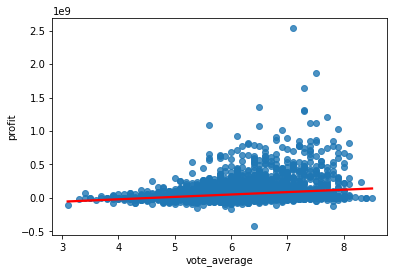

In [39]:
sb.regplot(x = 'vote_average', y= 'profit', data = df_counted, line_kws = {"color": 'red'} )

<Axes: xlabel='vote_average', ylabel='revenue'>

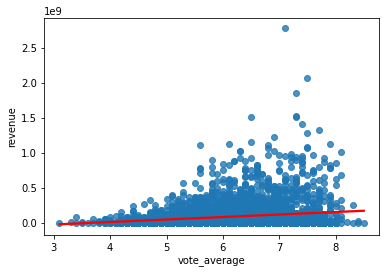

In [40]:
sb.regplot(x = 'vote_average', y= 'revenue', data = df_counted, line_kws = {"color": 'red'} )

Conclusion: There is no significant correlation between vote average and either profit or revenue.

2. The best movies according to popularity return high profit and revenue.

In [41]:
df_counted.corr(method = 'spearman', numeric_only=True)

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
popularity,1.00,0.48,0.59,0.50,0.23,0.77,0.19
budget,0.48,1.00,0.71,0.33,0.36,0.55,-0.04
revenue,0.59,0.71,1.00,0.84,0.34,0.68,0.11
profit,0.50,0.33,0.84,1.00,0.21,0.58,0.20
runtime,0.23,0.36,0.34,0.21,1.00,0.26,0.29
vote_count,0.77,0.55,0.68,0.58,0.26,1.00,0.29
vote_average,0.19,-0.04,0.11,0.20,0.29,0.29,1.00


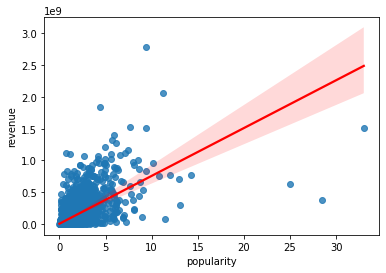

<Figure size 7200x720 with 0 Axes>

In [49]:
sb.regplot(x = 'popularity', y= 'revenue', data = df_counted, line_kws = {"color": 'red'} )
plt.figure(figsize = (100,10))
plt.show()

There is a strong correlation between popularity and revenue. 

 3. Highly budgeted movies return high profit.

In [50]:
df_counted.head(5)

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,vote_count,vote_average
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10
2,13.11,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30
3,11.17,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50
4,9.34,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30


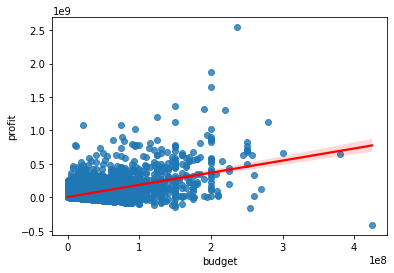

<Figure size 7200x720 with 0 Axes>

In [52]:
sb.regplot(x = 'budget', y= 'profit', data = df_counted, line_kws = {"color": 'red'} )
plt.figure(figsize = (100,10))
plt.show()

In [ ]:
The correlation between budget and profit (0.33) indicates a weak positive relationship.

 4. highly budgeted movies have a high popularity.

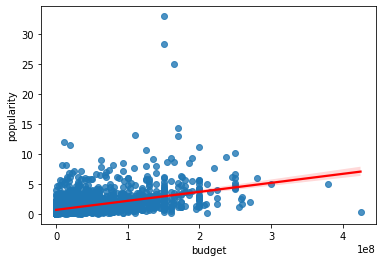

<Figure size 7200x720 with 0 Axes>

In [53]:
sb.regplot(x = 'budget', y= 'popularity', data = df_counted, line_kws = {"color": 'red'} )
plt.figure(figsize = (100,10))
plt.show()

The correlation between budget and popularity (0.48) reflects a moderate positive relationship, implying that larger budgets are associated with greater popularity.

5. Explore profit by genre and year in a time series.

In [67]:
df_genres.head(5)

,popularity,budget,revenue,profit,original_title,runtime,release_year,vote_count,vote_average,genres_split
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Action
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Adventure
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Science Fiction
0,32.99,150000000,1513528810,1363528810,Jurassic World,124,2015,5562,6.50,Thriller
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,120,2015,6185,7.10,Action


In [69]:
time_genre = pd.DataFrame(df_genres.groupby(['release_year','genres_split'])['profit'].mean())

In [72]:
time_genre.head(20)

profit
release_year genres_split                  
1960         Action            6,363,125.00
             Adventure           431,000.00
             Comedy            5,258,750.00
             Crime                     0.00
             Drama             8,245,619.38
             Family            3,333,333.33
             Fantasy            -375,000.00
             Foreign                   0.00
             History           9,600,000.00
             Horror            4,389,007.43
             Music                     0.00
             Romance           5,225,000.00
             Science Fiction    -316,666.67
             Thriller          5,028,842.00
             War                       0.00
             Western             484,166.67
1961         Action            2,457,142.86
             Adventure        39,130,002.33
             Animation       211,880,014.00
             Comedy           22,198,001.40

In [76]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])
final_genre.head(10)

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,
Action,"6,363,125.00","2,457,142.86","10,437,500.00","14,999,691.25","24,280,000.00","16,104,504.78","324,785.71","21,732,786.43","8,868,478.83","5,861,449.30","7,735,913.45",...,"32,379,154.19","38,048,623.21","45,977,444.05","47,642,764.40","57,555,510.74","34,571,030.36","51,968,078.25","71,910,257.42","47,431,725.63","69,943,650.02","90,399,046.75"
Adventure,"431,000.00","39,130,002.33","21,214,285.71","9,428,395.00","24,123,400.00","25,124,276.33","791,563.64","49,281,873.86","15,122,159.40","16,651,809.40","11,406,377.67",...,"70,756,754.32","64,895,200.09","83,916,731.08","55,016,526.81","113,364,919.74","98,125,646.68","113,343,224.56","162,549,574.30","100,638,113.40","120,373,306.99","144,787,868.97"
Animation,NaN,"211,880,014.00",NaN,0.00,0.00,0.00,"-105,000.00","100,921,706.00",0.00,0.00,"25,837,628.50",...,"40,307,312.15","39,047,734.97","67,147,670.53","51,907,242.58","48,862,898.25","58,455,658.64","63,420,098.93","69,231,546.88","93,718,795.26","64,313,463.25","83,691,174.38"
Comedy,"5,258,750.00","22,198,001.40","1,599,974.80","765,591.92","7,080,111.38","3,264,285.71","-149,550.00","10,135,087.47","-1,277,777.78","-125,000.00","11,901,488.58",...,"22,147,617.44","24,944,308.17","30,674,848.55","21,483,012.43","24,741,982.81","23,154,807.88","27,241,358.72","25,631,999.14","25,068,455.09","26,648,786.86","33,703,819.07"
Crime,0.00,"18,828,411.00","3,709,948.67","369,526.75","1,723,307.30","-22,500.00","-275,560.00","12,899,678.71","6,762,174.60","31,482,963.00","-2,125,000.00",...,"15,680,793.69","21,551,432.96","16,700,048.40","31,258,696.85","11,016,642.31","13,490,412.32","25,395,271.62","29,522,925.56","23,248,589.51","5,903,014.23","61,286,524.37"
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,...,"316,012.71","6,772,940.00","5,229,344.63","321,262.23","-1,603,933.56","187,417.77","2,567,196.82","1,102,306.59","321,880.23","13,104.14","531,061.86"
Drama,"8,245,619.38","4,912,698.38","4,373,796.19","1,587,307.69","3,726,105.55","11,933,809.80","1,014,793.06","18,045,095.00","6,354,859.15","10,317,995.54","19,753,262.84",...,"17,180,823.51","12,994,800.14","13,953,425.42","16,736,384.02","15,209,056.89","13,510,589.18","10,830,976.52","23,418,944.87","13,344,942.61","13,697,098.67","16,315,310.44"
Family,"3,333,333.33","42,576,002.80","4,000,000.00","-333,333.33","37,818,181.75","51,671,428.67","-341,828.57","64,281,204.00","-640,000.00",0.00,"17,225,085.67",...,"51,714,774.93","35,281,751.28","80,470,561.73","44,483,026.14","62,009,322.10","98,999,767.49","65,483,435.47","69,321,493.02","89,321,956.44","56,295,182.74","85,974,520.75"
Fantasy,"-375,000.00",0.00,-126.00,"-500,000.00","24,068,181.75",NaN,0.00,"-3,000,000.00","-2,000,000.00",0.00,0.00,...,"64,388,182.00","57,967,661.44","93,461,583.43","51,441,997.77","96,235,822.10","83,235,328.52","94,486,677.85","122,245,621.97","79,363,628.00","112,966,482.64","86,576,948.30"


Text(0.5, 1.0, 'Genres by Profit per Year')

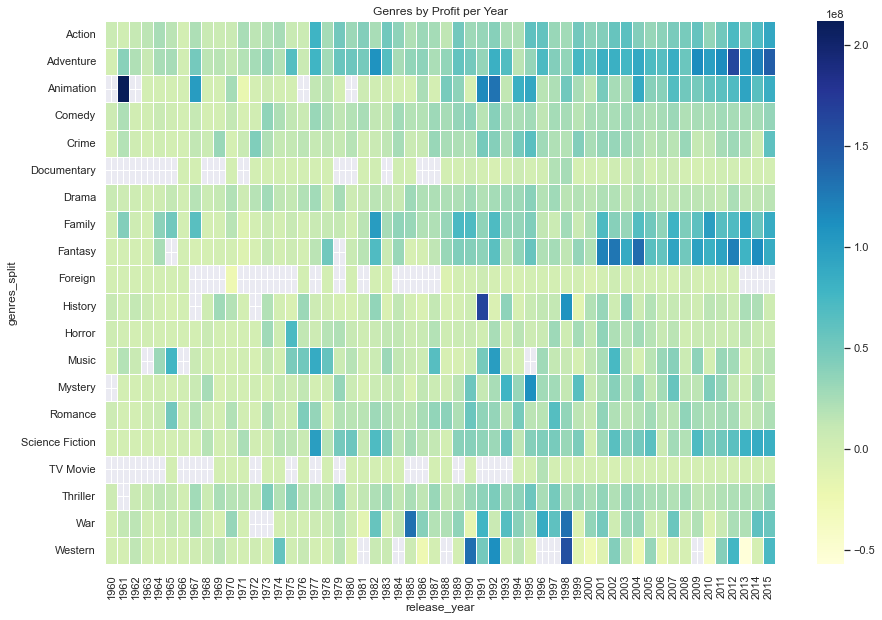

In [83]:
sb.set(rc = {'figure.figsize': (15,10)})
sb.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')

Adventure generated the high profits in 1982 and from 2009 to 2015.
Animation generated high profits in 1961, 1967, 1991, and 1992.
Family generated high profits in 1982, from 1989 to 1995, and from 2001 to 2015.
Fantasy generated high profits from 2001 to 2015.
History generated high profits in 1991 and 1998.
Music generated high profits in 1965, 1977, and 1992.
Mystery generated high profits in 1993 and 1995.
Science Fiction generated high profits in 1977 and from 2009 to 2015.
War generated high profits in 1985 and 1998.
Western generated high profits in 1990, 1992, 1998, 2012, and 2015.
